Text preprocessing

In [2]:
import os, re
import pandas as pd
import ufal.udpipe
import conllu

import my_parsers
import classifier_preprocessing
from voters import decision

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [3]:
%%time
decision('Борис взял и он начал читать.')

CPU times: user 15.3 ms, sys: 1.93 ms, total: 17.2 ms
Wall time: 308 ms


'TRUE'

In [4]:
DATA = os.path.join(os.getcwd(), 'Gold_standard_for_validation.txt')

In [5]:
with open(DATA, mode='r', encoding='utf-16') as data:
    corpus = data.read()

In [6]:
with open(DATA, mode='r', encoding='utf-16') as data:
    df = pd.read_csv(data, sep='\t', header=None, names=['sentence', 'class'])

In [7]:
# df = df.drop(['nan'], axis=1).drop([181])

In [8]:
df

,sentence,class
0,"Борис сказал, что придёт.",coreference resolution
1,Борис взял и начал читать.,TRUE
2,Борис взял и он начал читать.,FALSE
3,Борис встал и вышел.,TRUE
4,Борис встал и он вышел.,TRUE
...,...,...
176,"Я скоро увижу Лену и я искренно надеюсь, что о...",TRUE
177,"Я только что видел Лену.Она сказала, что наш д...",TRUE
178,"Я только что видел Лену.Сказала, что наш дом п...",FALSE
179,"Я только что встретил Лену.Cказала, что их отд...",FALSE


In [9]:
df['sentence'] = df['sentence'].apply(lambda x: classifier_preprocessing.preprocess(x))

In [10]:
%%time
df['evaluation1'] = df['sentence'].apply(lambda x: decision(x))
df['evaluation2'] = df['sentence'].apply(lambda x: decision(x))
df['evaluation3'] = df['sentence'].apply(lambda x: decision(x))
df['evaluation4'] = df['sentence'].apply(lambda x: decision(x))
df['evaluation5'] = df['sentence'].apply(lambda x: decision(x))

CPU times: user 4.49 s, sys: 418 ms, total: 4.91 s
Wall time: 2min 34s


In [11]:
df

,sentence,class,evaluation1,evaluation2,evaluation3,evaluation4,evaluation5
0,"Борис сказал, что придёт.",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution
1,Борис взял и начал читать.,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
2,Борис взял и он начал читать.,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
3,Борис встал и вышел.,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
4,Борис встал и он вышел.,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
...,...,...,...,...,...,...,...
176,"Я скоро увижу Лену и я искренно надеюсь, что о...",TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
177,"Я только что видел Лену.Она сказала, что наш д...",TRUE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution
178,"Я только что видел Лену.Сказала, что наш дом п...",FALSE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution
179,"Я только что встретил Лену.Cказала, что их отд...",FALSE,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution


In [12]:
df[df['evaluation1'] == 'None']

,sentence,class,evaluation1,evaluation2,evaluation3,evaluation4,evaluation5


In [13]:
decision("Борис сказал, что ей холодно.")

'coreference resolution'

In [14]:
df['numclass'] = df['class'].apply(lambda x: classifier_preprocessing.class2id(x))
df['numeval1'] = df['evaluation1'].apply(lambda x: int(classifier_preprocessing.class2id(x)))
df['numeval2'] = df['evaluation2'].apply(lambda x: int(classifier_preprocessing.class2id(x)))
df['numeval3'] = df['evaluation3'].apply(lambda x: int(classifier_preprocessing.class2id(x)))
df['numeval4'] = df['evaluation4'].apply(lambda x: int(classifier_preprocessing.class2id(x)))
df['numeval5'] = df['evaluation5'].apply(lambda x: int(classifier_preprocessing.class2id(x)))

In [15]:
df[df['numclass'] == 2]

,sentence,class,evaluation1,evaluation2,evaluation3,evaluation4,evaluation5,numclass,numeval1,numeval2,numeval3,numeval4,numeval5
0,"Борис сказал, что придёт.",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
5,"Борис встретился с Леной.Говорит, что их отдел...",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
8,"Борис объявил, что готов.",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
11,"Борис ответил, что придет завтра.",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
78,"Лена разговаривает с Борисом.Говорит, что отде...",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
160,"Саша обедает с Сашей.Сказала, что отдел скоро ...",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2
172,"Я сказал ему, чтобы приходил поскорее.",coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,coreference resolution,2,2,2,2,2,2


In [16]:
hand_rule_target = df['numclass']
pred1 = df['numeval1']
pred2 = df['numeval2']
pred3 = df['numeval3']
pred4 = df['numeval4']
pred5 = df['numeval5']
predictions = [pred1, pred2, pred3, pred4, pred5]

In [17]:
def precision_mean(predictions: list):
    results = list()
    for pred in predictions:
        results.append(precision_score(hand_rule_target, pred, average='weighted'))
    return 'Precision mean: %.4f' % (sum(results) / len(results))

In [18]:
def recall_mean(predictions: list):
    results = list()
    for pred in predictions:
        results.append(recall_score(hand_rule_target, pred, average='weighted'))
    return 'Recall mean: %.4f' % (sum(results) / len(results))

In [73]:
def f1_mean(predictions: list):
    results = list()
    for pred in predictions:
        results.append(f1_score(hand_rule_target, pred, average='weighted'))
    return 'F1 mean: %.4f' % (sum(results) / len(results))   

In [74]:
precision_mean(predictions)

'Precision mean: 0.7639'

In [75]:
recall_mean(predictions)

'Recall mean: 0.5414'

In [76]:
f1_mean(predictions)

'F1 mean: 0.6058'

In [77]:
print(classification_report(hand_rule_target, pred1))

              precision    recall  f1-score   support

           0       0.50      0.16      0.24        38
           1       0.87      0.62      0.73       136
           2       0.10      1.00      0.18         7

    accuracy                           0.54       181
   macro avg       0.49      0.59      0.38       181
weighted avg       0.76      0.54      0.60       181



In [79]:
%%time
decision('Борис сказал, что богат.')

CPU times: user 6.69 ms, sys: 334 µs, total: 7.03 ms
Wall time: 167 ms


'coreference resolution'

In [80]:
%%time
decision('Борис сказал, что зайдет вечером.')

CPU times: user 9.34 ms, sys: 0 ns, total: 9.34 ms
Wall time: 199 ms


'coreference resolution'

In [26]:
%%time
decision('Борис взял и вышел.')

CPU times: user 5.62 ms, sys: 242 µs, total: 5.87 ms
Wall time: 145 ms


'TRUE'

In [27]:
%%time 
decision('Миша узнал, что нужно делать, когда он придёт домой.')

CPU times: user 6.19 ms, sys: 325 µs, total: 6.52 ms
Wall time: 173 ms


'TRUE'

In [28]:
%%time 
decision('Борис сказал, что богат.')

CPU times: user 3.77 ms, sys: 3.38 ms, total: 7.15 ms
Wall time: 159 ms


'coreference resolution'

In [29]:
%%time
decision("Борис сказал, он зайдет.")

CPU times: user 6.23 ms, sys: 331 µs, total: 6.56 ms
Wall time: 151 ms


'TRUE'

In [30]:
%%time 
decision("Он сел рядом со мной на дивание недалеко от камина и после долгого молчания, во время которого я стала чувствовать себя всё более неуютно, он начал говорить.")

CPU times: user 12.5 ms, sys: 61 µs, total: 12.5 ms
Wall time: 279 ms


'TRUE'

In [31]:
%%time 
decision("Он встал и он вышел")

CPU times: user 9.85 ms, sys: 0 ns, total: 9.85 ms
Wall time: 154 ms


'FALSE'

In [32]:
decision("Дима распорядился, чтобы было объявлено, что он покинул страну.")

'TRUE'

In [33]:
decision("Лина хочет, чтобы выиграла")

'FALSE'

In [34]:
decision("Дима сказал маме Кирилла, чтобы она приходила поскорее.")

'TRUE'

In [35]:
decision("Дима сказал маме Кирилла, чтобы приходила поскорее.")

'coreference resolution'

# Classifier

In [36]:
import numpy as np

In [37]:
with open(DATA, mode='r', encoding='utf-16') as data:
    df_clas = pd.read_csv(data, sep='\t', header=None, names=['sentence', 'class'])

In [38]:
df_clas['sentence'] = df_clas['sentence'].apply(lambda x: classifier_preprocessing.preprocess(x))

In [39]:
df_clas['class'] = df_clas['class'].apply(lambda x: classifier_preprocessing.class2id(x))

In [40]:
df_clas

,sentence,class
0,"Борис сказал, что придёт.",2
1,Борис взял и начал читать.,1
2,Борис взял и он начал читать.,0
3,Борис встал и вышел.,1
4,Борис встал и он вышел.,1
...,...,...
176,"Я скоро увижу Лену и я искренно надеюсь, что о...",1
177,"Я только что видел Лену.Она сказала, что наш д...",1
178,"Я только что видел Лену.Сказала, что наш дом п...",0
179,"Я только что встретил Лену.Cказала, что их отд...",0


In [41]:
import my_parsers

In [42]:
%%time
df_clas['conll'] = df_clas['sentence'].apply(lambda x: my_parsers.udpipe_req(x))

CPU times: user 867 ms, sys: 109 ms, total: 977 ms
Wall time: 31.1 s


In [43]:
df_clas['cconj'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_conj(x, 'CCONJ'))

In [44]:
df_clas['sconj'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_conj(x, 'SCONJ'))

In [45]:
df_clas['tokens'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_tokens(x))

In [46]:
df_clas['nullp'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_null_pron(x))

In [47]:
df_clas['overtp'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_overt_pron(x))

In [48]:
df_clas['adj'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_adjuncts(x))

In [49]:
df_clas['whq'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_whquestions(x))

In [50]:
df_clas['relc'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_relclauses(x))

In [51]:
df_clas['datdep'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_case_nodes(x, 'Dat'))

In [52]:
df_clas['nomdep'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_case_nodes(x, 'Nom'))

In [53]:
df_clas['rootlen'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.get_root_length(x))

In [54]:
df_clas['rootdeps'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_root_dependents(x))

In [55]:
df_clas['rootpos'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.get_root_pos(x))

In [56]:
df_clas['rootmatch'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.is_there_exact_string_match(x))

In [57]:
df_clas['rootdatdep'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_root_case_dep(x, 'Dat'))

In [58]:
df_clas['rootnomdep'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.count_root_case_dep(x, 'Nom'))

In [59]:
df_clas['att'] = df_clas['conll'].apply(lambda x: classifier_preprocessing.is_there_att_verb(x))

In [60]:
df_clas.head()

,sentence,class,conll,cconj,sconj,tokens,nullp,overtp,adj,whq,relc,datdep,nomdep,rootlen,rootdeps,rootpos,rootmatch,rootdatdep,rootnomdep,att
0,"Борис сказал, что придёт.",2,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",0,1,4,1,1,0,0,0,0,1,6,3,0,1,0,1,1
1,Борис взял и начал читать.,1,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,5,1,1,0,0,0,0,1,4,3,0,1,0,1,0
2,Борис взял и он начал читать.,0,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,6,0,2,0,0,0,0,2,4,3,0,1,0,1,0
3,Борис встал и вышел.,1,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,4,1,1,0,0,0,0,1,5,3,0,1,0,1,0
4,Борис встал и он вышел.,1,"[[{'id': 1, 'form': 'Борис', 'lemma': 'Борис',...",1,0,5,0,2,0,0,0,0,2,5,3,0,1,0,1,0


# Data description

In [61]:
df_clas = df_clas.drop(['conll', 'sentence'], axis=1)

Number of 'FALSE' sentences

In [62]:
len(df_clas[df_clas['class'] == 0])

38

Number of 'TRUE' sentences

In [63]:
len(df_clas[df_clas['class'] == 1])

136

Number of 'coreference resolution' sentences

In [64]:
len(df_clas[df_clas['class'] == 2])

7

In [65]:
df_clas = df_clas[df_clas['class'] != 2]

In [66]:
dataset = df_clas.to_numpy()

In [67]:
# target, data
target = dataset[:,0]
data = dataset[:,1:]

# Evaluation

In [68]:
# !pip3 install matplotlib

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density

import matplotlib.pyplot as plt

In [70]:
def benchmark(clf):
    print('Training: ', clf)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    precisions = cross_val_score(clf, data, target, cv=cv, scoring='precision')
    recalls = cross_val_score(clf, data, target, cv=cv, scoring='recall')
    f1scores = cross_val_score(clf, data, target, cv=cv, scoring='f1')
    
    precision_mean = precisions.mean()
    precision_std = precisions.std()
    print('Precision - mean: ', precision_mean, ' - std: ', precision_std)
    
    recall_mean = recalls.mean()
    recall_std = recalls.std()
    print('Recall - mean: ', recall_mean, ' - std: ', recall_std)
    
    f1score_mean = f1scores.mean()
    f1score_std = f1scores.std()
    print('F1 score - mean: ', f1score_mean, ' - std: ', f1score_std)
    
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, precision_mean, recall_mean, f1score_mean

In [71]:
results = list()
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
        (Perceptron(max_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(max_iter=50),
         "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=500,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=500,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3, max_iter=30000))),
  ('classification', LinearSVC(penalty="l2", max_iter=30000))])))

Ridge Classifier
Training:  RidgeClassifier(solver='sag', tol=0.01)
Precision - mean:  0.8047511312217195  - std:  0.026470910518722385
Recall - mean:  0.9581027886841842  - std:  0.03330756850175747
F1 score - mean:  0.8738539627740188  - std:  0.009477947170107318

Perceptron
Training:  Perceptron(max_iter=50)
Precision - mean:  0.8333320601940264  - std:  0.08595002709183269
Recall - mean:  0.7791150709755361  - std:  0.30372039797721495
F1 score - mean:  0.747036949526591  - std:  0.20256311925403558

Passive-Aggressive
Training:  PassiveAggressiveClassifier(max_iter=50)
Precision - mean:  0.8155640270874551  - std:  0.03722423348212032
Recall - mean:  0.6261904761904762  - std:  0.41904761904761906
F1 score - mean:  0.8896459855810634  - std:  0.018258557494780978

kNN
Training:  KNeighborsClassifier(n_neighbors=10)
Precision - mean:  0.7959077378411452  - std:  0.03235888514112569
Recall - mean:  0.9813852813852814  - std:  0.022808553891462326
F1 score - mean:  0.878330142446025

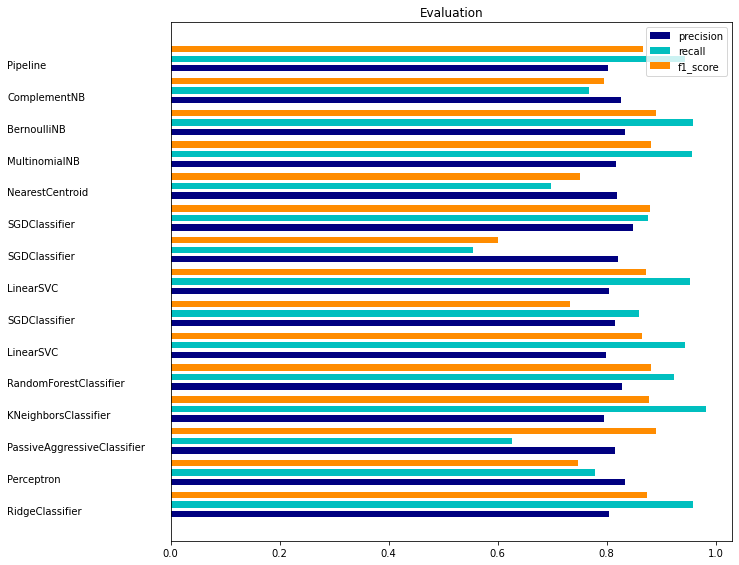

In [72]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]
# print(results)

clf_names, precision, recall, f1score = results

plt.figure(figsize=(12, 8))
plt.title("Evaluation")

plt.barh(indices, precision, .2, label="precision", color='navy')
plt.barh(indices + .3, recall, .2, label="recall", color='c')
plt.barh(indices + .6, f1score, .2, label="f1_score", color='darkorange')

plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()